### Gene co-expression analyses are gaining in popularity, and while there are a number of publications describing the pitfalls of small sample size, the implications may not be immediately apparent. 

### Here, I'll use variously sized matrices to demonstrate the effects of small sample size in gene co-expression analyses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
def generate_correlation_example(samples=3, genes=1000):
    """Generates a plot showing how spurious 
    correlation changes with matrix size"""
    # Warning: gene counts over 5,000 will take a while to compute
    
    # Generate counts. Note, reads are not actually distributed 
    # according to a normal distribution with mean 0 and stdev 1,
    # but we aren't concerned with the counts themselves 
    matrix = []
    for i in range(samples):
        matrix.append(np.random.normal(0,1,genes))
    df = pd.DataFrame(matrix)
    
    # We generate the gene correlation matrix which is a 
    # gene_number x gene_number (ex. 1,000 x 1,000) symmetric matrix
    # We further take the absolute values of the 
    # correlation so they are all between 0 and 1
    df_corr = df.corr()
    df_corr = df_corr.abs()
    
    plt.figure()
    # Remove self correlation with [1:]
    plt.scatter(df_corr.index[1:], df_corr[0][1:])
    plt.hlines(0.8,-20,genes+20)
    plt.xlim(-10,genes+10)
    plt.ylim(0,1)
    plt.title("Pearson correlation coefficient for gene_1 to {0} others".format(
        genes-1))

    np.fill_diagonal(df_corr.values, 0)
    print("Average number of correlations >= 0.8 for each gene")
    print(str(np.mean(df_corr[df_corr >= 0.8].count())) + 
          " out of {0} genes with correlation over 0.8\n".format(genes-1))

# 3 Samples of 1,000 genes

### While a matrix of 1,000 genes and 3 samples is not representative of typical analyses, it illustrates the point.

### Here, we plot the pearson product moment correlation for the first gene to all others.

### Notice how the number of correlated genes above 0.8 (a typical threshold for correlation) is quite substantial for these random data.

Average number of correlations >= 0.8 for each gene
408.174 out of 999 genes with correlation over 0.8



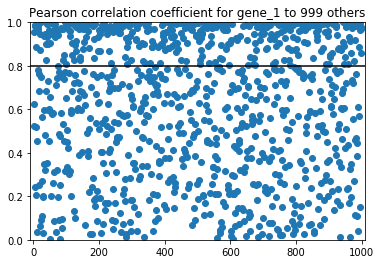

In [3]:
generate_correlation_example(samples=3, genes=1000)

# 9 Samples of 1,000 genes

### Even if we triple our sample size to 9, we still see a number of genes that are artificially correlated with one another

Average number of correlations >= 0.8 for each gene
9.762 out of 999 genes with correlation over 0.8



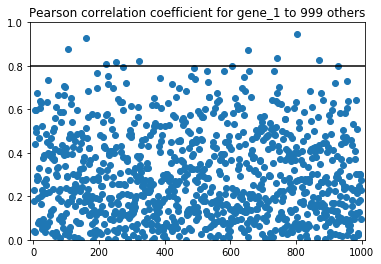

In [4]:
generate_correlation_example(samples=9, genes=1000)

# 20 Samples of 1,000 genes

### The minimum number of samples recommended for co-expression analysis is 20. Here, we see that there are substantially fewer genes that pass the 0.8 threshold.

Average number of correlations >= 0.8 for each gene
0.032 out of 999 genes with correlation over 0.8



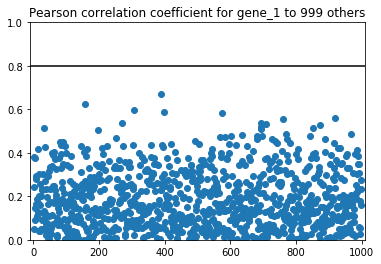

In [5]:
generate_correlation_example(samples=20, genes=1000)

# 3 Samples of 3,000 genes

### Problematically, we typically work with matrices with many genes and few samples (say 9-12 samples and 25,000 genes)

### This increase in the number of genes leads to more spurious correlation

Average number of correlations >= 0.8 for each gene
1228.6693333333333 out of 2999 genes with correlation over 0.8



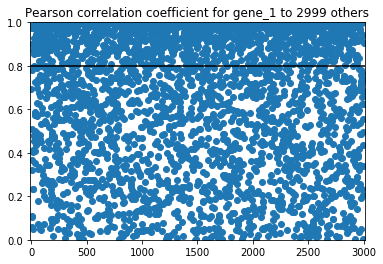

In [6]:
generate_correlation_example(samples=3, genes=3000)

# 20 Samples of 3,000 genes

Average number of correlations >= 0.8 for each gene
0.06266666666666666 out of 2999 genes with correlation over 0.8



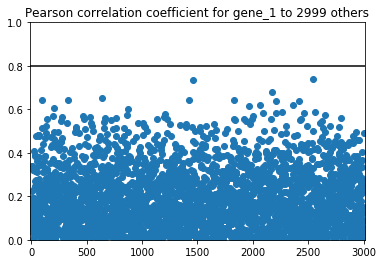

In [7]:
generate_correlation_example(samples=20, genes=3000)